# **Assignment 1:** Decision Tree với bộ dữ liệu **penguins**.
---
### Họ và Tên: Nguyễn Trường Giang
### MSSV: 24520011
---

## Đề bài:
### 1. Áp dụng các hàm plot có sẵn trong file hướng dẫn, tìm hiểu thêm các plot khác để khảo sát & phân tích bộ dữ liệu.
- `sns.scatterplot()`
- `sns.displot()`
- `sns.jointplot()`
- `sns.pairplot()`
- ...
### 2. Tìm hiểu cách chia tập dữ liệu thành 2 tập train và test 
- `train_test_split()`
    - Tập train dùng để huấn luyện mô hình
    - Tập test dùng để kiểm thử độ chính xác của mô hình (`accuracy_score()`)
### 3. Thử nghiệm các **hyperparameter** `max_depth`, đưa ra nhận xét chúng ảnh hưởng như thế nào đối với độ chính xác của mô hinh trên tập test.
---
[Link code kaggle](https://www.kaggle.com/code/brolynoring/mcs-assignment-1)
---

## 1. Khai báo các thư viện cần sử dụng.
- **pandas:** Xử lý, phân  tích dữ liệu
- **matplotlib:** Vẽ biểu đồ
- **seaborn:** Tạo các dạng biểu đồ khác nhau
- **sklearn:**
  - Chia tập dữ liệu `sklearn.model_selection.train_test_split`
  - Mô hình cây có sẵn `sklearn.tree.DecisionTreeClassifier` và hàm trực quan hóa decision tree `sklearn.tree.plot_tree`
  - Đánh giá độ chính xác mô hình `sklearn.metrics.accuracy_score`
  - Label encoding để tiền sử lý dữ liệu `sklearn.preprocessing.LabelEncoding`

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## 2. Tải, tiền xử lý dataset **penguins** và trực quan hóa dữ liệu bằng các biểu đồ

In [2]:
df = sns.load_dataset("penguins")
    

### 2.1. Hiển thị một số thông tin về dữ liệu

- Cột species là mục tiêu mà mô hình cần phải dự đoán.
- island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex: là các
feature của mô hình

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [5]:
df.describe

<bound method NDFrame.describe of     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  

### 2.2. Xử lý missing data
- Như thông tin được mô tả sơ ở trên, có thể dễ dàng nhận thấy rằng có vài dữ liệu chứa NaN. Vì thế dựa vào cell dưới đây, ta thấy khá nhiều features tồn tại giá trị đó, điều này khiến cho mô hình khó nếu như không muốn nói là không hoạt động được.
- Vì thế ta cần thêm 1 bước xử lý các **missing data** bằng một vài phương pháp:
    - Nếu dữ liệu của feature ở dạng số: Ta thay NaN bằng trung bình cộng (còn nhiều phương pháp khác như lấy trung bình của 2 dữ liệu liền kề, ...)
    - Nếu dữ liệu của feature ở dạng object: Ta thay NaN thành object được xuất hiện nhiều nhất trong feature đó.

In [6]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
def HandleNaN(df):
    # Đối với feature có dạng số float hoặc số int
    for col in df.select_dtypes(include=['float', 'int']).columns:
        df[col] = df[col].fillna(df[col].mean())
    
    # Đối với feature có dạng object
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].fillna(df[col].mode()[0])
HandleNaN(df)

In [8]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### 2.3. Encoding
- Vì mô hình không học dược dựa trên các dữ liệu *object*, do đó ta phải chuyển qua các dữ liệu số với kĩ thuật **label encoding** đối với feature: sex và **one-hot encoding** đối với feature island (lý do là đối với các dữ liệu dạng object, ta nên sử dụng phương pháp *one-hot encoding*, vì nó sẽ tránh việc mô hình học thứ tự của chúng. Còn feature sex chỉ có 2 giá trị nên ta label encoding thì sẽ không có ảnh hưởng gì).

In [9]:
def Encoding(df):
    le = LabelEncoder()
    new_df = pd.get_dummies(df, columns=["island"], drop_first=False)
    new_df['sex'] = le.fit_transform(new_df['sex'])
    return new_df
df = Encoding(df)
df.head

<bound method NDFrame.head of     species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0    Adelie        39.10000       18.70000         181.000000  3750.000000   
1    Adelie        39.50000       17.40000         186.000000  3800.000000   
2    Adelie        40.30000       18.00000         195.000000  3250.000000   
3    Adelie        43.92193       17.15117         200.915205  4201.754386   
4    Adelie        36.70000       19.30000         193.000000  3450.000000   
..      ...             ...            ...                ...          ...   
339  Gentoo        43.92193       17.15117         200.915205  4201.754386   
340  Gentoo        46.80000       14.30000         215.000000  4850.000000   
341  Gentoo        50.40000       15.70000         222.000000  5750.000000   
342  Gentoo        45.20000       14.80000         212.000000  5200.000000   
343  Gentoo        49.90000       16.10000         213.000000  5400.000000   

     sex  island_Biscoe  island_D

### 2.4. Trực quan hóa dữ liệu với các biểu đồ.
- `sns.scatterplot()`
- `sns.displot()`
- `sns.jointplot()`
- `sns.pairplot()`

In [10]:
palette = {'Adelie': 'orange', 'Chinstrap': 'green', 'Gentoo': 'purple'}

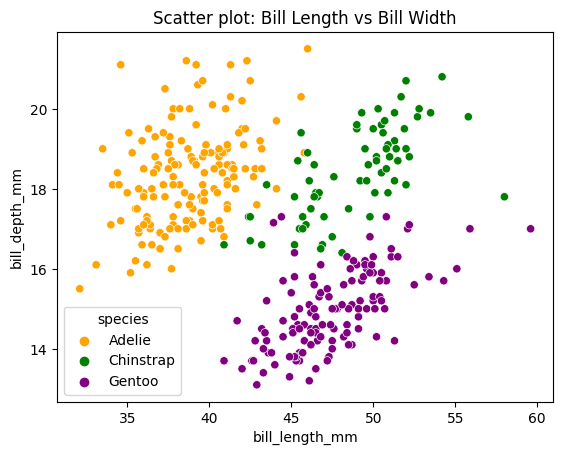

In [11]:
sns.scatterplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species", palette=palette)
plt.title("Scatter plot: Bill Length vs Bill Width")
plt.show()

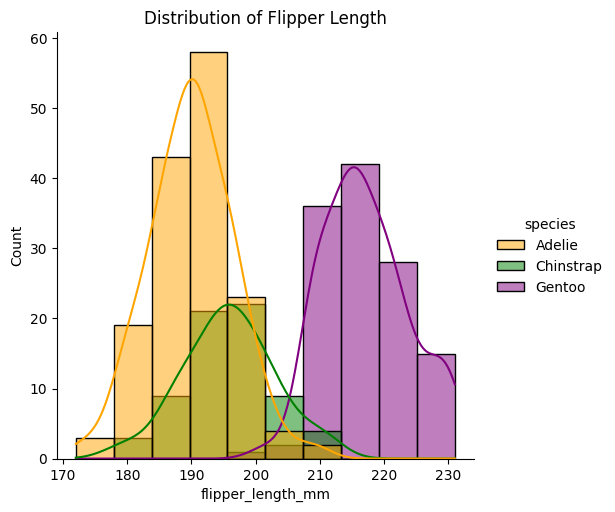

In [12]:
sns.displot(data=df, x="flipper_length_mm", hue="species", kde=True, palette=palette)
plt.title("Distribution of Flipper Length")
plt.show()


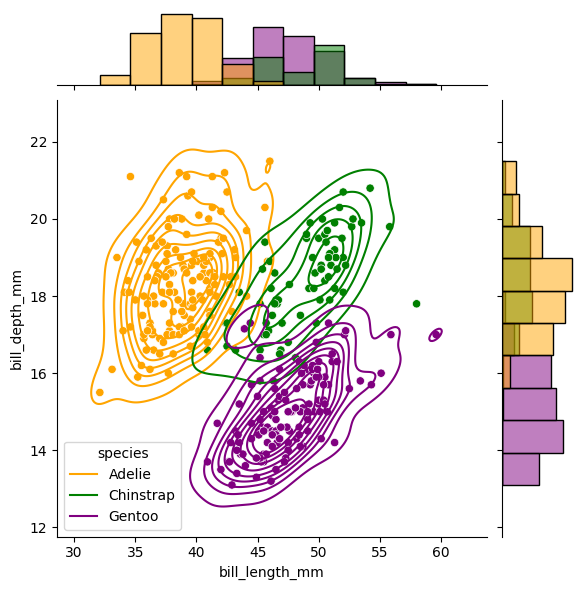

In [13]:
g = sns.jointplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species", palette=palette)
g.plot_joint(sns.kdeplot)
g.plot_marginals(sns.histplot)

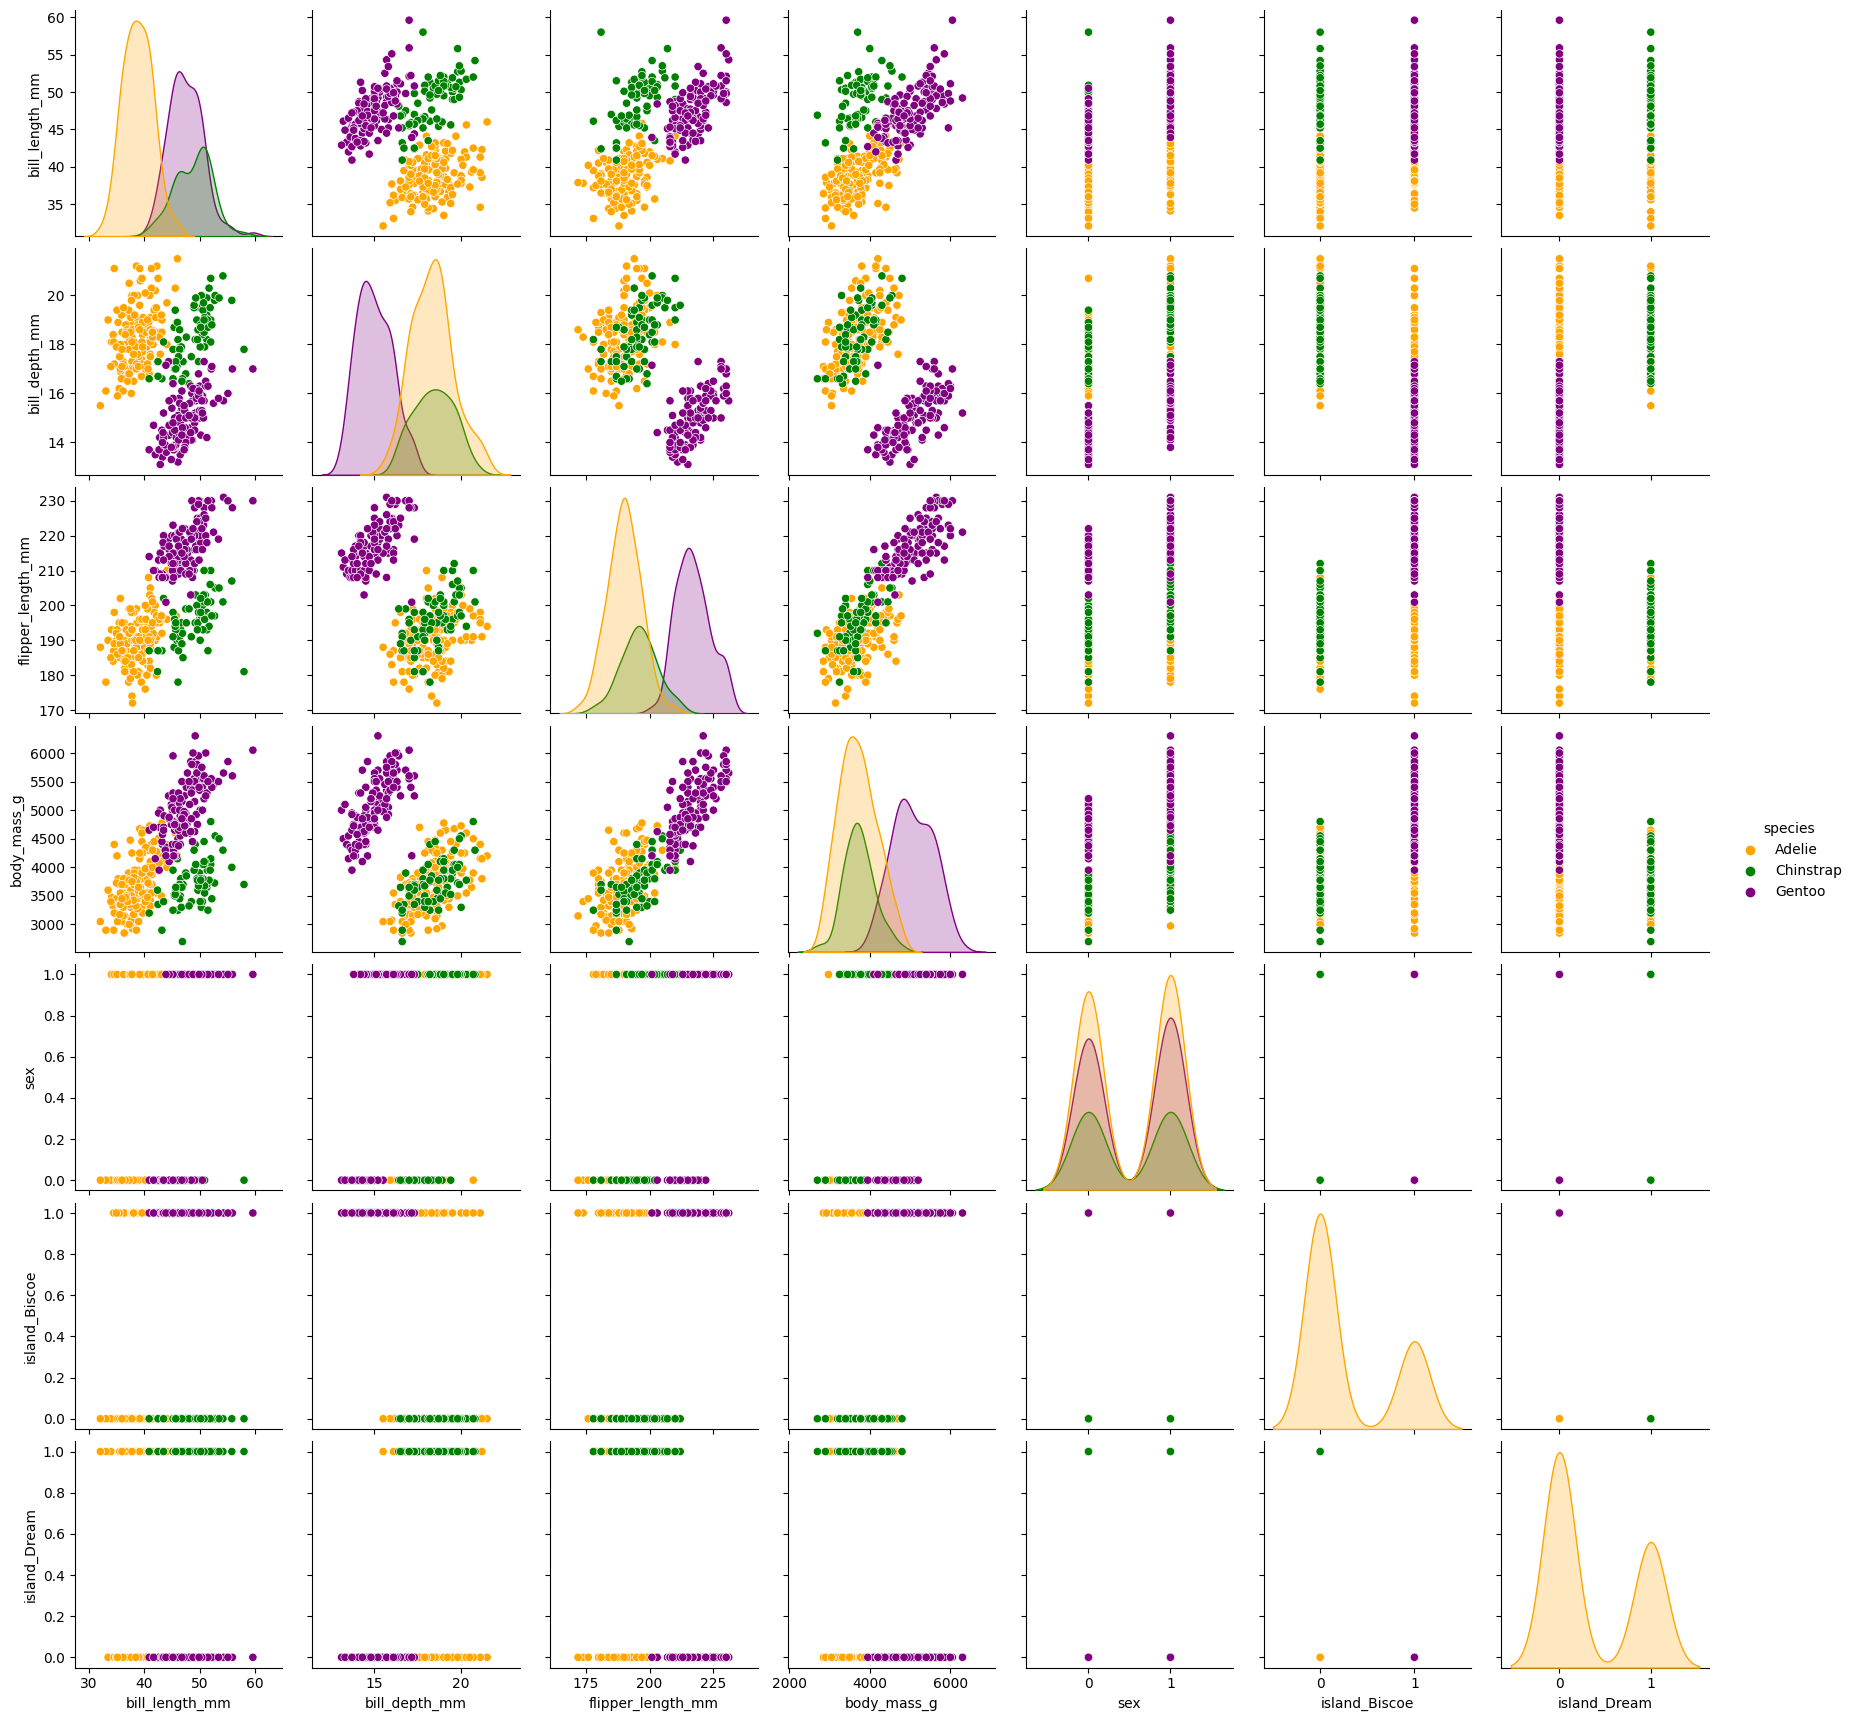

In [14]:
sns.pairplot(data=df, vars=df.columns[1:8], hue="species", palette=palette)
plt.show()


In [15]:
import plotly.express as px 
fig = px.scatter_3d(df, x="bill_length_mm", y="bill_depth_mm", z="flipper_length_mm", color="species") 
fig.update_layout(width=1000, height=700)
fig.show()

## 3. Chia tập dữ liệu thành tập train và tập test
Sử dụng hàm `train_test_split()` với các đối số test_size thường chia theo tỉ lệ $80\%$ cho tập train và $20\%$ cho tập test.

In [16]:
def SplitDF(df):
    X = df.drop('species', axis=1)
    y = df['species']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24520011, shuffle=True)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = SplitDF(df)

def GetFeatureName(X=X_train):
    return X.columns

GetFeatureName()

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'sex', 'island_Biscoe', 'island_Dream', 'island_Torgersen'],
      dtype='object')

## 4. Huấn luyện mô hình Decision Tree
Sử dụng mô hình được cài đặt sẵn trong thư viện scikit-learn, ta sẽ huấn luyện mô hình dựa trên bộ dữ liệu train đã chia:

In [17]:
def Train(X_train, y_train, max_depth):
    model = DecisionTreeClassifier(random_state=24520011, max_depth=max_depth)
    model.fit(X_train, y_train) 
    return model

## 5. Thử nghiệm **hyperparameter** `max_depth`:

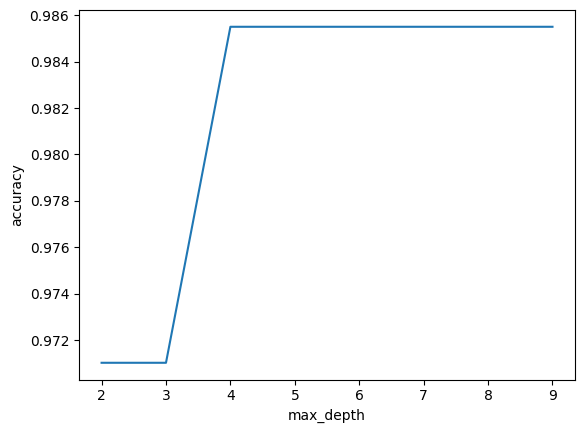

In [18]:
def TestHyperparameter(low, high):
    accuracy = []
    
    for max_depth in range(low, high):
        model = Train(X_train, y_train, max_depth)
        y_pred = model.predict(X_test)

        accuracy.append(accuracy_score(y_test, y_pred))
    plt.plot(range(low, high), accuracy)
    plt.xlabel("max_depth")
    plt.ylabel("accuracy")

TestHyperparameter(2, 10)

## 6. Nhận xét và chọn ra mô hình với siêu tham số phù hợp nhất.

Dựa vào biểu đồ trên, dễ dàng nhận thấy rằng:
- Với $max_{depth}<4$, mô hình có accuracy khá thấp so với các $max_depth$ còn lại, điều này cho thấy mô hình đang bị **underfitting**.
- Với $max_{depth}>4$, mô hình vẫn giữa nguyên accuracy so với độ sâu 4. Có thể nói là do dataset này khá nhỏ để accuracy giảm thay vì giữ nguyên như vậy, nhưng dù cho có giảm hay giữ nguyên thì đây vẫn là **overfitting**.
Do đó, cách tối ưu nhất là chọn $max_{depth}=4$ cho mô hình trên.

In [19]:
model = Train(X_train=X_train, y_train=y_train, max_depth=4)

## 7. Trực quan hóa mô hình

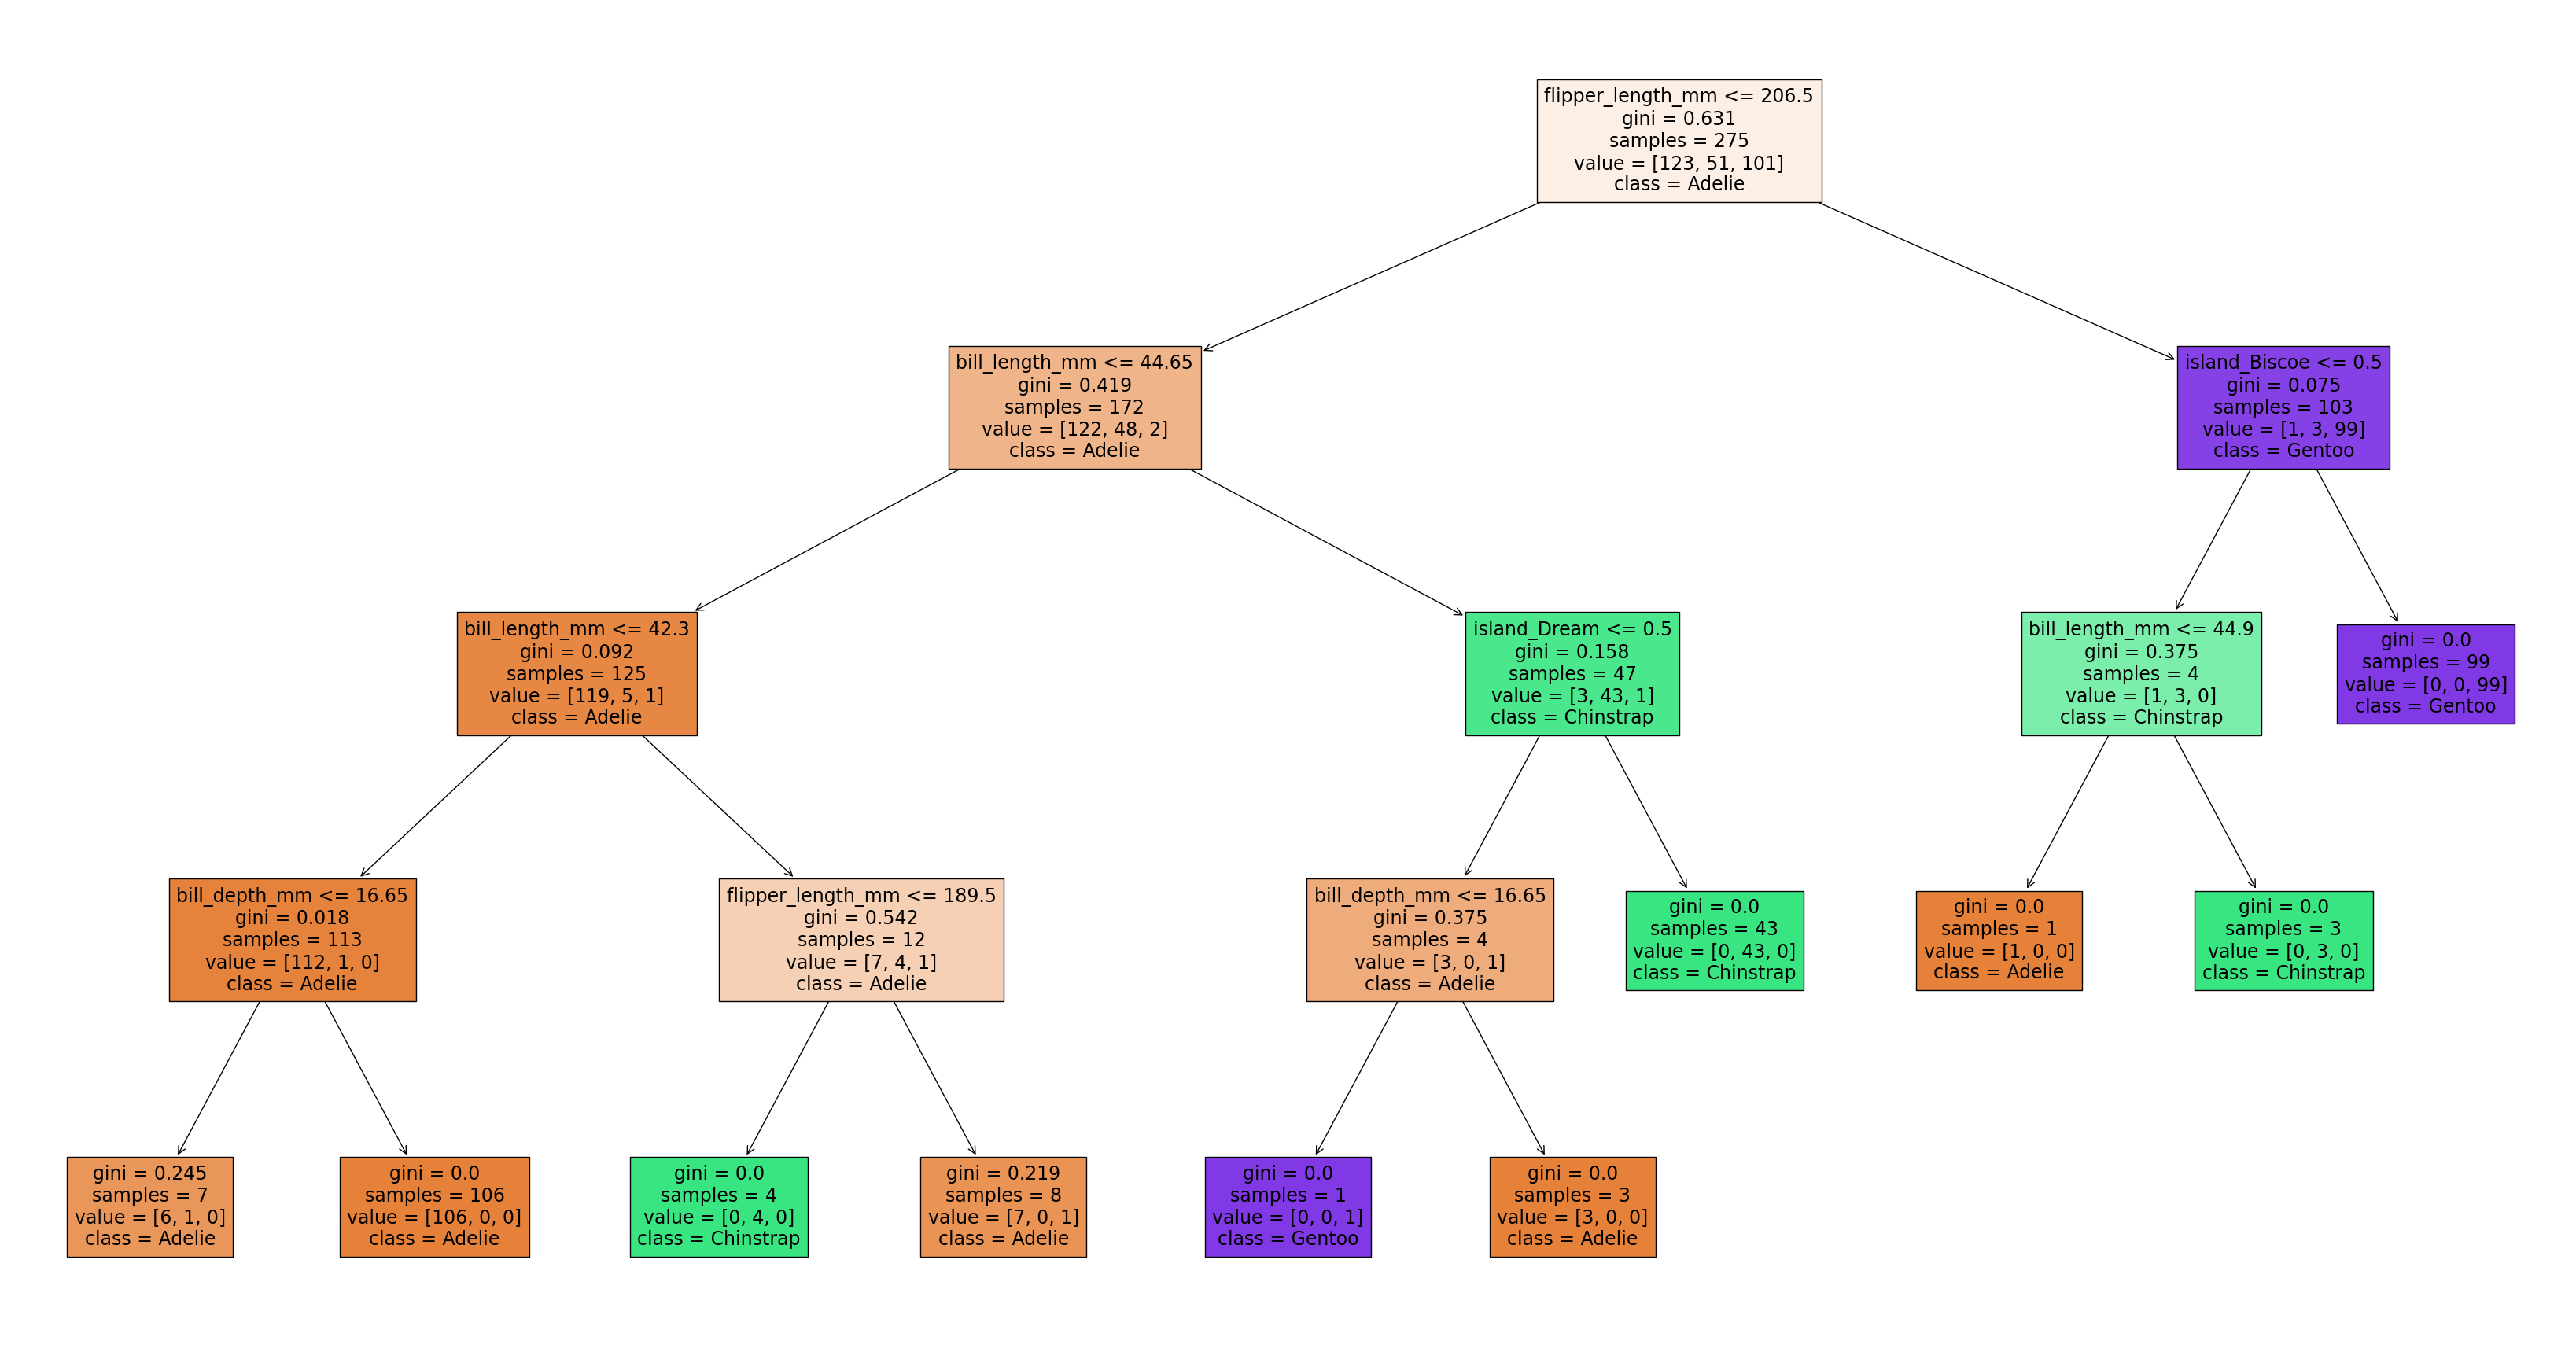

In [20]:
plt.figure(figsize=(42, 22))
_ = plot_tree(model, filled=True, feature_names=GetFeatureName(), class_names= model.classes_)
